In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
sns.set()
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
properties_colombia_train=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\jupyter nt\columbia_houses_train.csv')

In [3]:
properties_colombia_test=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon\jupyter nt\columbia_houses_test.csv')

 el valor mínimo de esa característica se transforma en 0 mientras que el valor máximo se transforma en 1 y todos los demás valores se normalizan entre 0 y 1. Sin embargo, este método tiene un inconveniente ya que es sensible a valores atípicos.

In [4]:
columns_scaler=['lat', 'lon', 'bathrooms', 'created_on_year', 'created_on_month',
'created_on_day', 'end_date_year', 'end_date_month', 'end_date_day',
'start_date_year', 'start_date_month', 'start_date_day']

In [5]:
from sklearn.preprocessing import RobustScaler
newdf_5=properties_colombia_train[columns_scaler]
RobustScaler_features =RobustScaler().fit_transform(newdf_5.values)

df=pd.DataFrame(RobustScaler_features)
df.columns=columns_scaler


In [6]:
columnas_faltantes=['property_type_Apartamento', 'property_type_Casa','property_type_Finca', 'property_type_Local comercial','property_type_Lote', 'property_type_Oficina', 'property_type_Otro','property_type_Parqueadero', 'currency_COP', 'currency_USD',"price_Binary"]
df_new6=properties_colombia_train[columnas_faltantes].copy()
df[columnas_faltantes]=df_new6[columnas_faltantes].copy()

In [7]:
#tomo los valores de las columnas
X = df.iloc[:,:-1]
y =df.iloc[:,[22]]

In [8]:
#divido los datos en test y entrenamiento
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [9]:
""" 
explicación:

.valuesdará los valores en una numpymatriz (forma: (n,1))

.ravelconvertirá esa forma de matriz en (n, ) (es decir, la aplanará)
"""
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 16,solver='lbfgs', max_iter=1000) 
classifier.fit(X_train, y_train.values.ravel()) 

LogisticRegression(max_iter=1000, random_state=16)

escalo los datos de el archivo test

In [10]:
from sklearn.preprocessing import RobustScaler
newdf_5_test=properties_colombia_test[columns_scaler]
RobustScaler_features_test = RobustScaler().fit_transform(newdf_5_test.values)

df_test=pd.DataFrame(RobustScaler_features_test)
df_test.columns=columns_scaler


In [11]:
columnas_faltantes=['property_type_Apartamento', 'property_type_Casa','property_type_Finca', 'property_type_Local comercial','property_type_Lote', 'property_type_Oficina', 'property_type_Otro','property_type_Parqueadero', 'currency_COP', 'currency_USD']
df_new6_test=properties_colombia_test[columnas_faltantes].copy()
df_test[columnas_faltantes]=df_new6_test[columnas_faltantes].copy()

In [12]:
X = df_test.iloc[:,]
res=classifier.predict(X)

In [13]:
col=["pred"]
df3=pd.DataFrame(res)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df3.columns=col

antes de RobustScaler


<AxesSubplot:xlabel='lat', ylabel='Density'>

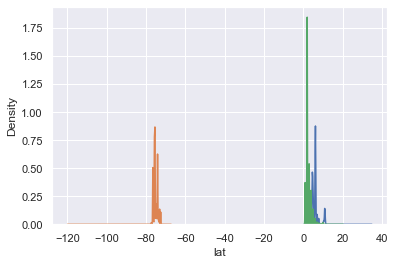

In [14]:
print("antes de RobustScaler")
sns.kdeplot(properties_colombia_train["lat"])
sns.kdeplot(properties_colombia_train["lon"])
sns.kdeplot(properties_colombia_train["bathrooms"])  

Despues de RobustScaler


<AxesSubplot:xlabel='lat', ylabel='Density'>

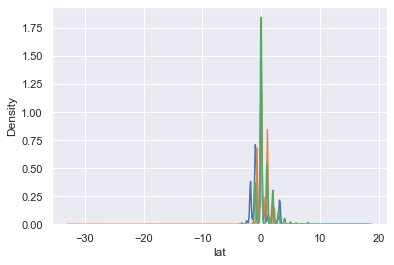

In [15]:
print("Despues de RobustScaler")
sns.kdeplot(df["lat"])
sns.kdeplot(df["lon"])
sns.kdeplot(df["bathrooms"])

In [16]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(X_test) 
test_acc = precision_score(y_test, y_pred)
print('La precisión del conjunto de pruebas es {}'.format(test_acc*100))

La precisión del conjunto de pruebas es 70.88293422806453


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     27663
           1       0.71      0.71      0.71     21724

    accuracy                           0.74     49387
   macro avg       0.74      0.74      0.74     49387
weighted avg       0.74      0.74      0.74     49387



Text(0.5, 30.5, 'Valores previstos')

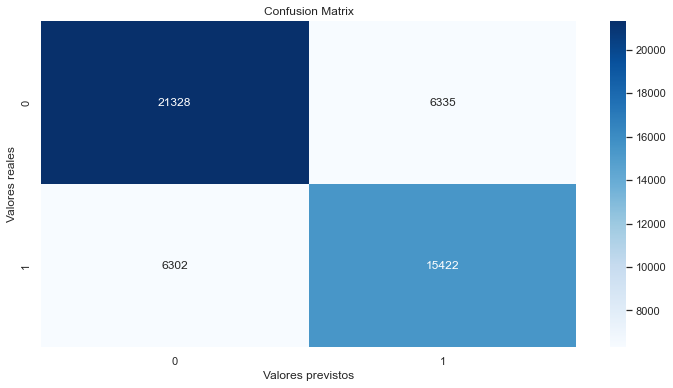

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
plt.figure(figsize=(12,6)) 
plt.title("Confusion Matrix") 
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues' ) 
plt.ylabel("Valores reales") 
plt.xlabel("Valores previstos")

In [19]:
df3

,pred
0,1
1,1
2,0
3,1
4,0
...,...
65845,0
65846,0
65847,1
65848,0


In [20]:
df3.to_csv("bparedes21.csv", index=False)